In [17]:
import pandas as pd
import numpy as np

distanceByTruck = pd.read_csv('Distance_CountryToLarger.csv',index_col = 0)

In [18]:
distanceByTruck['min_val'] = distanceByTruck.min(axis=1)
distanceByTruck.head()

,West River Transit,Vision Transportation of Elk River | Big Lake | Rogers | Zimmerman,River Cities Public Transit,Two Rivers Transportation,Blue Rivers Public Transportation,"Transport 360, LLC.","Five Rivers Transport, LLC",East Side River Transportation Inc,River City Transportation,River Transportation Co,min_val
Name,,,,,,,,,,,
Agency Rail LLC,885.89,493.55,795.65,577.52,448.05,360.41,382.29,167.19,157.16,279.50,157.16
Airial Construction,820.99,428.65,779.94,561.67,487.29,493.69,515.53,291.00,126.48,312.67,126.48
"Alliance Builders And Construction, Inc.",832.76,440.41,791.71,573.43,504.29,496.02,517.90,302.80,143.48,292.62,143.48
Artix Construction Inc,819.26,426.91,778.20,559.93,497.56,503.96,525.80,302.22,136.75,313.22,136.75
Assumption Cooperative Grain,960.82,568.48,866.09,650.76,422.89,335.26,357.13,114.61,220.03,281.38,114.61


In [19]:
def NormalizateData(OriginData, NMin, NMax, OMax, OMin):
    N = NMin + ((NMax-NMin)/(OMax-OMin))*(OriginData-OMin)
    return ("%.2f"  %N)

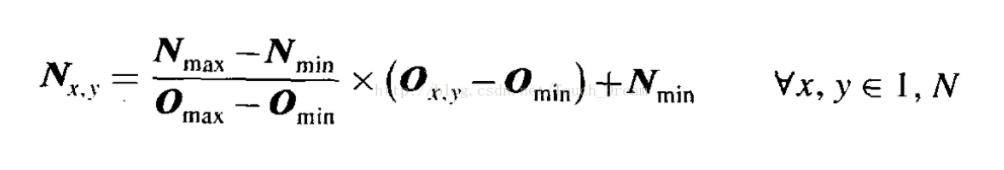

In [20]:
OMax = distanceByTruck['min_val'].max()
OMin = distanceByTruck['min_val'].min()
Cost = []
for i in range(len(distanceByTruck['min_val'])):
    Cost.append(NormalizateData(distanceByTruck['min_val'].iloc[i], 3, 18, OMax, OMin))
Cost

['8.78',
 '7.60',
 '8.26',
 '8.00',
 '7.14',
 '4.52',
 '6.34',
 '7.71',
 '8.02',
 '8.26',
 '8.50',
 '10.44',
 '8.35',
 '7.95',
 '6.94',
 '6.89',
 '11.01',
 '10.99',
 '7.79',
 '8.13',
 '9.70',
 '8.07',
 '8.15',
 '8.26',
 '7.82',
 '8.28',
 '7.59',
 '6.84',
 '5.57',
 '8.05',
 '7.18',
 '8.96',
 '7.99',
 '8.93',
 '8.26',
 '6.05',
 '6.05',
 '4.86',
 '6.69',
 '8.43',
 '7.79',
 '7.88',
 '8.68',
 '8.00',
 '6.22',
 '3.68',
 '10.35',
 '7.07',
 '8.61',
 '4.40',
 '9.17',
 '7.85',
 '9.75',
 '6.67',
 '7.51',
 '8.26',
 '6.48',
 '7.13',
 '8.24',
 '3.56',
 '6.21',
 '8.14',
 '8.45',
 '7.73',
 '10.26',
 '9.58',
 '10.38',
 '11.44',
 '10.82',
 '10.99',
 '9.15',
 '9.57',
 '6.80',
 '10.90',
 '10.07',
 '4.35',
 '9.80',
 '8.19',
 '6.64',
 '9.98',
 '7.72',
 '9.30',
 '9.90',
 '7.87',
 '7.75',
 '7.87',
 '8.93',
 '6.63',
 '10.27',
 '10.27',
 '9.57',
 '8.72',
 '8.05',
 '6.54',
 '7.68',
 '5.53',
 '13.02',
 '14.85',
 '6.19',
 '4.32',
 '8.55',
 '6.79',
 '6.74',
 '3.19',
 '10.44',
 '9.59',
 '7.63',
 '6.34',
 '10.44',
 '

In [26]:
# write truck's cost to facility and Holding Cost of Country Elevators to file 
CostToFacility = distanceByTruck['min_val'].copy()
CostToFacility = CostToFacility.rename('Facility').to_frame()
CostToFacility['HoldingCost'] = 0

for i in range(CostToFacility.shape[0]):
    # assume this value is 1.5 times the cost to its larger elevators
    CostToFacility.iloc[i,0]= 1.5 * float(NormalizateData(distanceByTruck['min_val'].iloc[i], 3, 18, OMax, OMin))
    # assume this valeu is between 8 to 15
    CostToFacility.iloc[i,1] = round(np.random.uniform(8,15),2)

CostToFacility.to_csv('CostToFacility.csv')

In [ ]:
# write trucks' cost from Country to Larger to file
TCostByDistance = distanceByTruck.copy()
TCostByDistance = TCostByDistance.drop('min_val',axis=1)

for i in range(TCostByDistance.shape[0]):
    for j in range(TCostByDistance.shape[1]):
        TCostByDistance.iloc[i,j] = NormalizateData(distanceByTruck.iloc[i,j], 3, 18, OMax, OMin)
    
TCostByDistance.to_csv('MileCostByTruck.csv')